In [1]:
import CoolProp 
from CoolProp.CoolProp import PropsSI
import pandas as pd
import numpy as np
import glob,sys,socket,fileinput
import os.path
import matplotlib.pyplot as p

In [2]:
D=50/1000 #Diametro de la parte cilindrica [m]
rho=PropsSI('D', 'T', 288.15, 'P', 1e5, 'AIR') #Densidad del aire [kg/m3]
mu=PropsSI('V', 'T', 288.15, 'P', 1e5, 'AIR') #Viscocidad del aire [Pa. s]
L=0.175*2 #Largo del cilindro en metros
A=D*L ## area proyectada

In [3]:
# en calibrationData va el nombre del archivo que 
CDfile = "CD.txt"
CDData=open(CDfile,"w")
#CDData.write('txt,Media Lift,Media Drag,STD Lift,STD Drag\n');
CDData.write('txt,MediaLift,MediaDrag\n');

In [20]:
VelocityFile = "Velocidades Calibradas/Velocidades.txt"
VelocityData = pd.read_csv(VelocityFile)
PolinomioVelocidad=np.polyfit(VelocityData["V [V]"],VelocityData["U [m/s]"],1)

Velocidad_tunel = np.poly1d(PolinomioVelocidad)

In [5]:
RawDataFolder = "Raw Data/"
files = np.sort(glob.glob(RawDataFolder+'*.txt'))
VoltajeMedicion=[]
VelocidadMedicion=[]
ReMedicion=[]
for i in files:
    #item=i.strip("Raw Data\\V")
    item = i.split(os.sep)[1][1:]
    item=item.strip(".txt")
    item=item.strip("")
    VoltajeMedicion.append(float(item))
    Vitem=PolinomioVelocidad[0]*float(item)+PolinomioVelocidad[1]
    VelocidadMedicion.append(Vitem)
    ReMedicion.append(Vitem*D*rho/mu)

In [6]:
Inicial= {
    "Voltaje" : VoltajeMedicion,
    "Velocidad" : VelocidadMedicion,
    "Re" : ReMedicion,
    }
DFInicial = pd.DataFrame(Inicial)
DFInicial

,Voltaje,Velocidad,Re
0,0.00,-0.120047,-404.193435
1,11.04,0.890184,2997.224731
2,15.65,1.312029,4417.563294
3,27.76,2.420172,8148.647895
4,33.96,2.987512,10058.864618
5,38.35,3.389225,11411.421298
6,40.40,3.576813,12043.025215
7,45.80,4.070948,13706.762361
8,49.70,4.427823,14908.350300


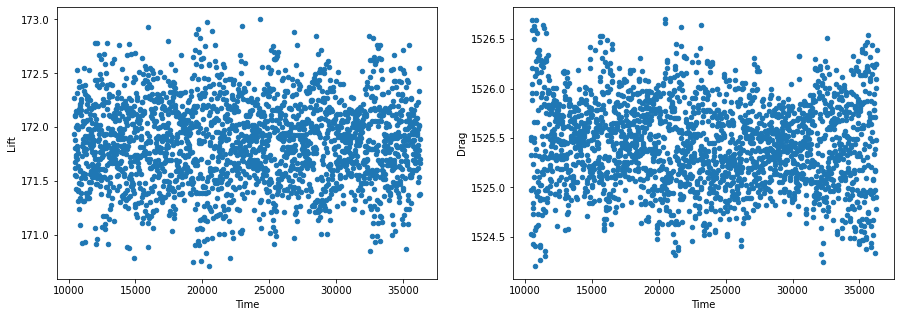

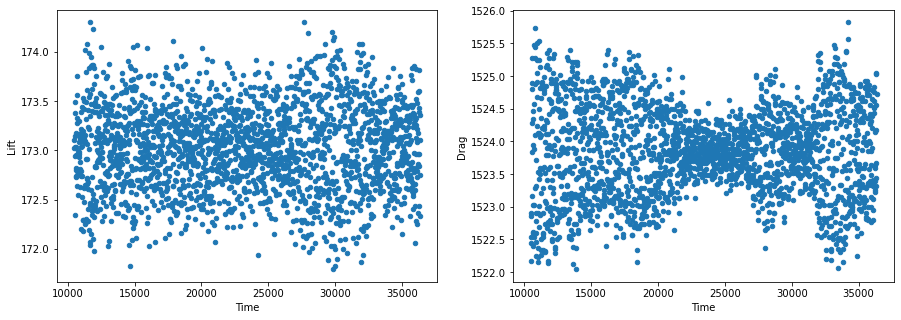

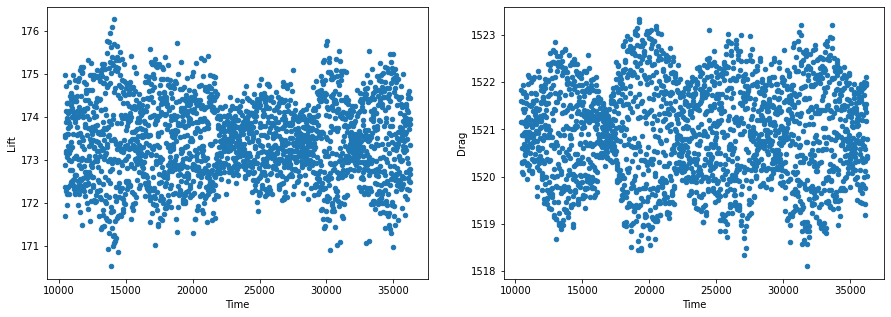

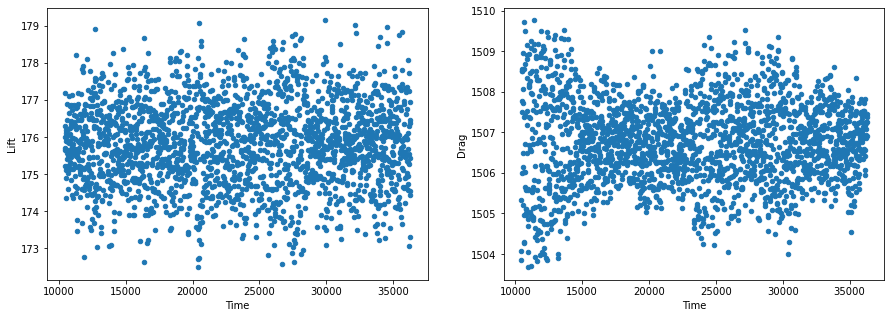

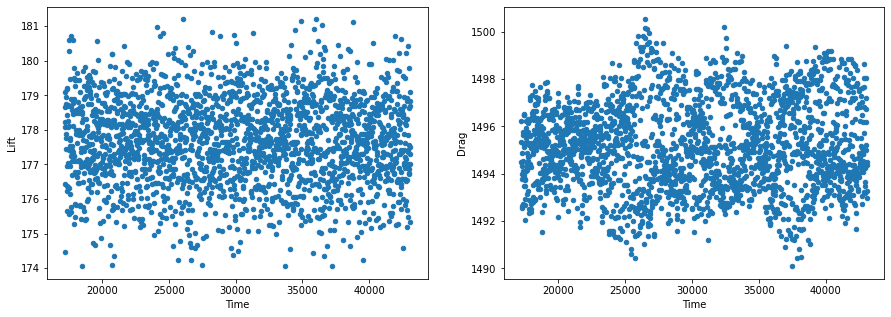

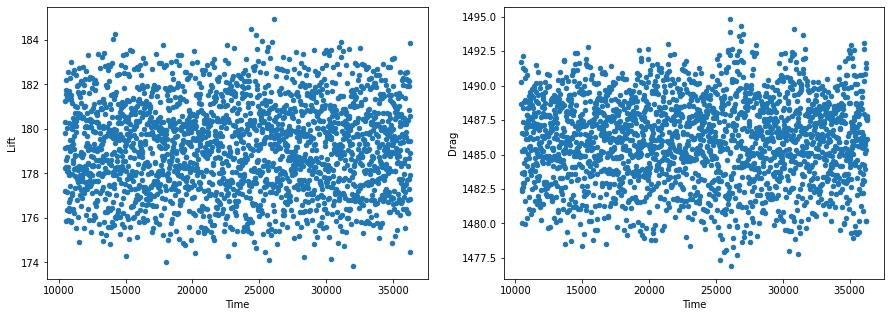

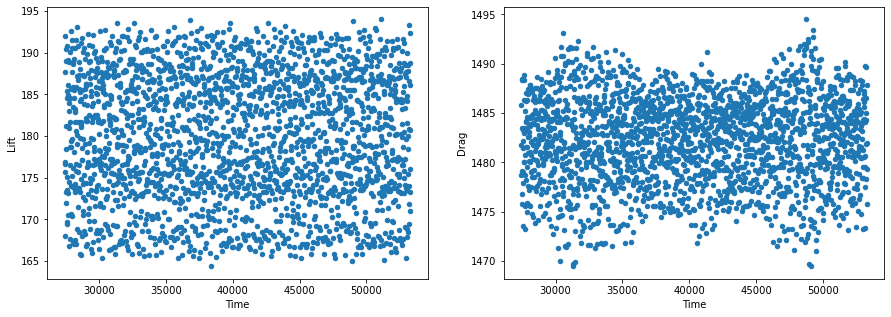

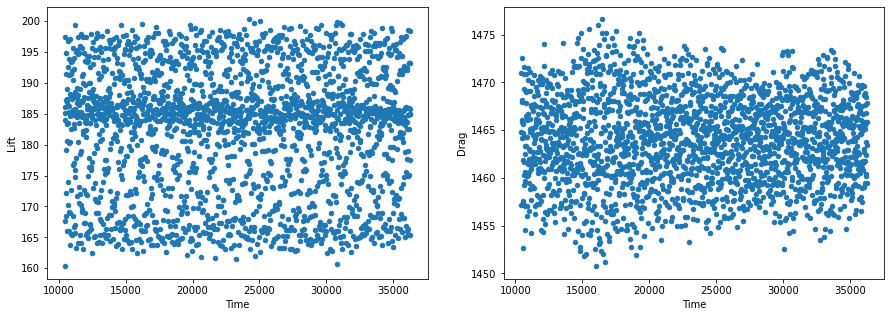

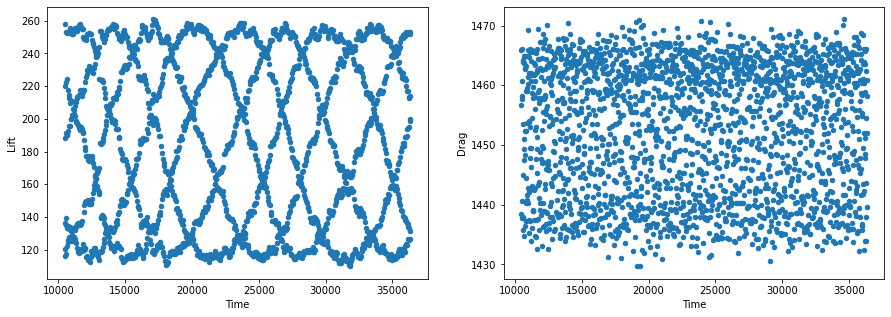

In [7]:
for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift", "Drag", "Time"]
    datos = datos.astype(float)
    datos=datos[800:3000]
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=(datos["Drag"].mean())
    stdDrag=(datos["Drag"].std())
    df=datos
    
 
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+3*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-3*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+3*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-3*stdDrag):
            df["Drag"][i]=np.nan
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=datos["Drag"].mean()
    stdDrag=datos["Drag"].std()   
    
    for i in df.index:
        if df["Lift"][i]>(mediaLift+3*stdLift):
            df["Lift"][i]=np.nan
        if df["Lift"][i]<(mediaLift-3*stdLift):
            df["Lift"][i]=np.nan
        if df["Drag"][i]>(mediaDrag+3*stdDrag):
            df["Drag"][i]=np.nan
        if df["Drag"][i]<(mediaDrag-3*stdDrag):
            df["Drag"][i]=np.nan
    mediaLift=datos["Lift"].mean()
    stdLift=datos["Lift"].std()
    mediaDrag=datos["Drag"].mean()
    stdDrag=datos["Drag"].std()
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time", y="Lift")
    df.plot.scatter(ax=axes[1],x="Time", y="Drag")
    fig.savefig(k+".png", dpi=100)
    
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    #CDData.write(i+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    CDData.write(str(k)+","+str(mediaLift)+","+str(mediaDrag)+"\n")


In [8]:
CDData.close()
DFFinal=pd.read_csv(CDfile)
DFFinal

,txt,MediaLift,MediaDrag
0,Raw Data/V00.00.txt,171.857162,1525.432842
1,Raw Data/V11.04.txt,173.025578,1523.843595
2,Raw Data/V15.65.txt,173.427448,1520.933541
3,Raw Data/V27.76.txt,175.810466,1506.759028
4,Raw Data/V33.96.txt,177.686673,1495.157131
5,Raw Data/V38.35.txt,179.194220,1486.068576
6,Raw Data/V40.40.txt,179.876538,1482.274333
7,Raw Data/V45.80.txt,182.449395,1463.963802
8,Raw Data/V49.7.txt,184.323474,1452.561215


,txt,MediaLift,MediaDrag
0,Raw Dataa/V00.00.txt,-7.396941,1475.640749
1,Raw Dataa/V10.95.txt,-7.390886,1473.104942
2,Raw Dataa/V15.65.txt,-7.320168,1472.575229
3,Raw Dataa/V27.76.txt,-6.942904,1469.968048
4,Raw Dataa/V33.96.txt,-6.601890,1466.516127
5,Raw Dataa/V38.35.txt,-6.353479,1463.787066
6,Raw Dataa/V40.40.txt,-6.134143,1461.533300
7,Raw Dataa/V45.80.txt,-5.813600,1458.930286
8,Raw Dataa/V49.90.txt,-5.477058,1453.962095


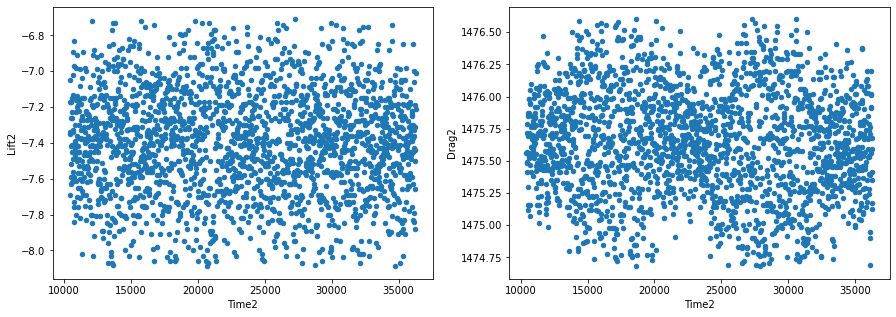

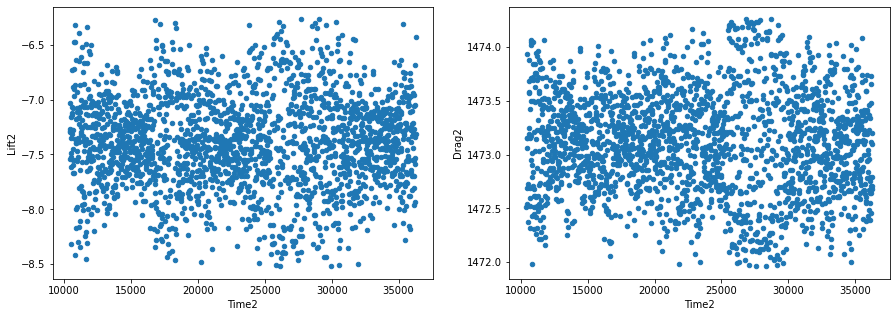

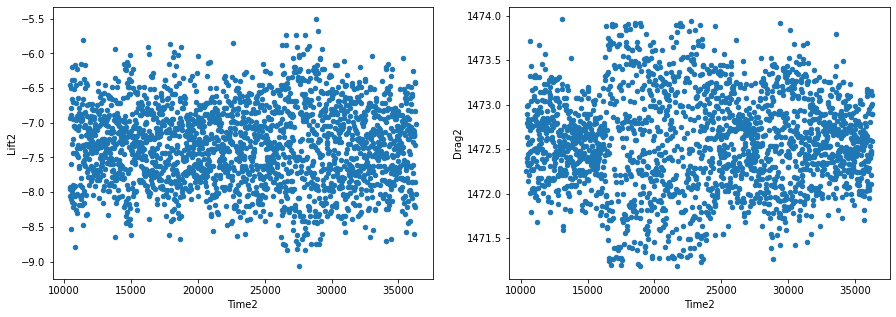

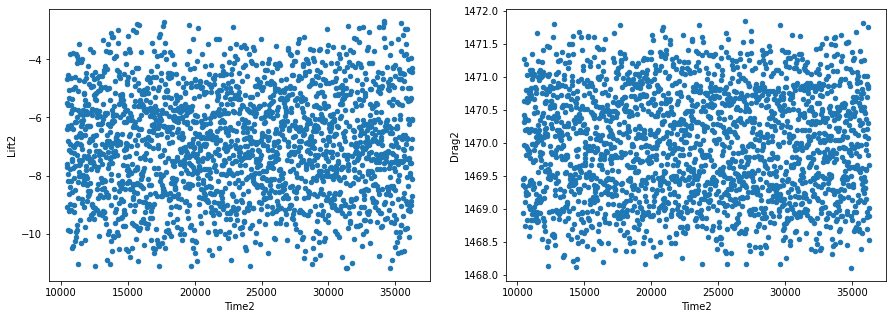

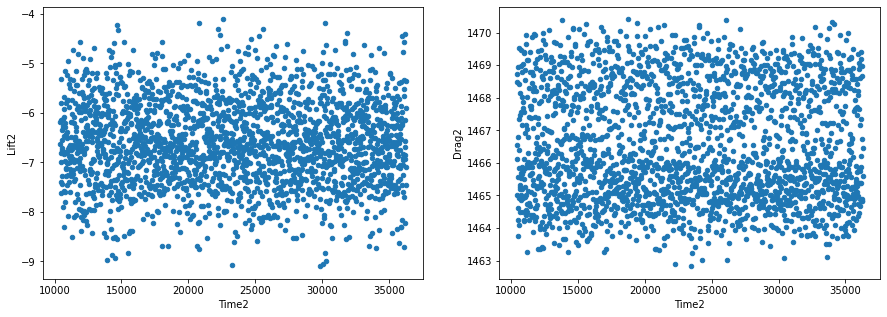

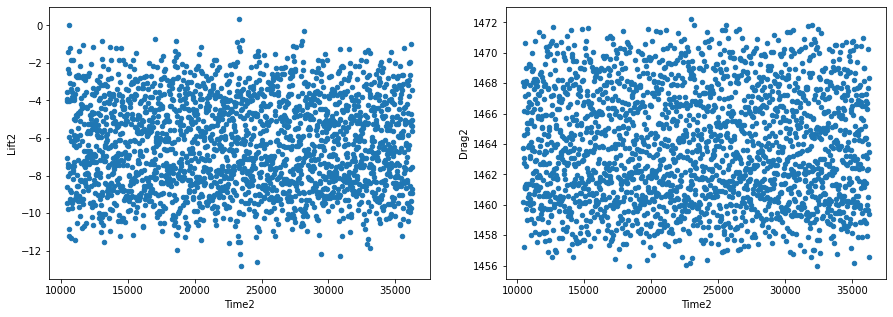

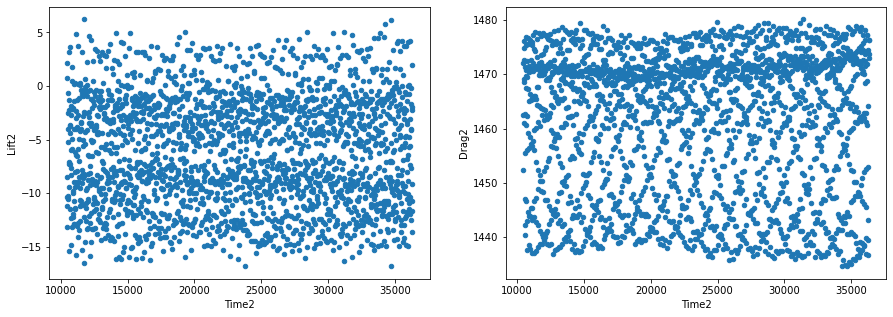

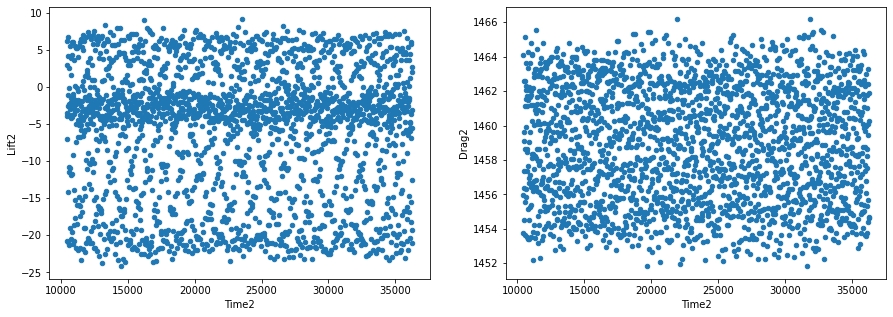

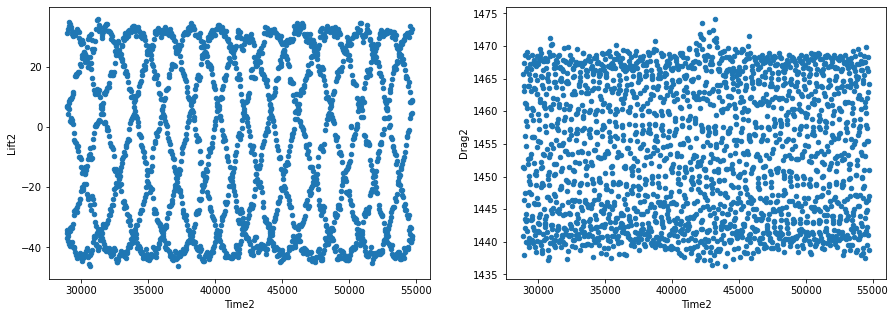

In [9]:
# en calibrationData va el nombre del archivo que 
CDfile = "CD2.txt"
CDData=open(CDfile,"w")
#CDData.write('txt,Media Lift,Media Drag,STD Lift,STD Drag\n');
CDData.write('txt,MediaLift,MediaDrag\n');

RawDataFolder = "Raw Dataa/"
files = np.sort(glob.glob(RawDataFolder+'*.txt'))
VoltajeMedicion=[]
VelocidadMedicion=[]
ReMedicion=[]
for i in files:
    #item=i.strip("Raw Dataa\\V")
    item = i.split(os.sep)[1][1:]
    item=item.strip(".txt")
    item=item.strip("")
    VoltajeMedicion.append(float(item))
    Vitem=PolinomioVelocidad[0]*float(item)+PolinomioVelocidad[1]
    VelocidadMedicion.append(Vitem)
    ReMedicion.append(Vitem*D*rho/mu)
    
Inicial= {
    "Voltaje" : VoltajeMedicion,
    "Velocidad" : VelocidadMedicion,
    "Re" : ReMedicion,
    }
DFInicial2 = pd.DataFrame(Inicial)

for k in files:
    datos = pd.read_csv(k, sep=",", header=None,skiprows=5)
    datos = datos[:-100]
    datos.columns = ["Lift2", "Drag2", "Time2"]
    datos = datos.astype(float)
    datos=datos[800:3000]
    mediaLift=datos["Lift2"].mean()
    stdLift=datos["Lift2"].std()
    mediaDrag=(datos["Drag2"].mean())
    stdDrag=(datos["Drag2"].std())
    df=datos
    
 
    
    for i in df.index:
        if df["Lift2"][i]>(mediaLift+2.25*stdLift):
            df["Lift2"][i]=np.nan
        if df["Lift2"][i]<(mediaLift-2.25*stdLift):
            df["Lift2"][i]=np.nan
        if df["Drag2"][i]>(mediaDrag+2.25*stdDrag):
            df["Drag2"][i]=np.nan
        if df["Drag2"][i]<(mediaDrag-2.25*stdDrag):
            df["Drag2"][i]=np.nan
    mediaLift=datos["Lift2"].mean()
    stdLift=datos["Lift2"].std()
    mediaDrag=datos["Drag2"].mean()
    stdDrag=datos["Drag2"].std()   
    
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.set_size_inches(15, 5)
    df.plot.scatter(ax=axes[0],x="Time2", y="Lift2")
    df.plot.scatter(ax=axes[1],x="Time2", y="Drag2")
    fig.savefig(k+".png", dpi=100)
    
    # Las lineas vienen como #.txt,mediaL,mediaD,stdL,stdD
    #CDData.write(i+","+str(mediaLift)+","+str(mediaDrag)+","+str(stdLift)+","+str(stdDrag)+"\n")
    CDData.write(str(k)+","+str(mediaLift)+","+str(mediaDrag)+"\n")
    
CDData.close()
DFFinal2=pd.read_csv(CDfile)
DFFinal2

In [10]:
DatosCD=pd.concat([DFFinal,DFInicial],axis =1)
DatosCD2=pd.concat([DFFinal2,DFInicial2],axis =1)

In [11]:
## Tomo la referencia y la borro del original


Referencia=DatosCD[:1]
Drag0=Referencia["MediaDrag"][0]
Lift0=Referencia["MediaLift"][0]
DatosCD=DatosCD.drop([0]) 


Referencia2=DatosCD2[:1]
Drag02=Referencia2["MediaDrag"][0]
Lift02=Referencia2["MediaLift"][0]
DatosCD2=DatosCD2.drop([0]) 

In [12]:
### Uso la referencia para poner en 0 todo
DatosCD["Drag"]= DatosCD["MediaDrag"]-Drag0
DatosCD["Lift"]= DatosCD["MediaLift"]-Lift0

DatosCD2["Drag"]= DatosCD2["MediaDrag"]-Drag02
DatosCD2["Lift"]= DatosCD2["MediaLift"]-Lift02

In [13]:
DatosCD["Drag"]= DatosCD["Drag"]-DatosCD2["Drag"]
DatosCD["Lift"]= DatosCD["Lift"]-DatosCD2["Lift"]

In [14]:
#limpio los datos que ya no me sirven

DatosCD=DatosCD.drop("txt", axis=1)
DatosCD=DatosCD.drop("MediaDrag", axis=1)
DatosCD=DatosCD.drop("MediaLift", axis=1)

In [15]:
A

0.017499999999999998

In [36]:
DatosCD["CD"]=-DatosCD["Drag"]*0.00980665/(0.5*A*rho*DatosCD["Velocidad"]*DatosCD["Velocidad"])/2.17
DatosCD["CL"]=DatosCD["Lift"]*0.00980665/(0.5*A*rho*DatosCD["Velocidad"]*DatosCD["Velocidad"])

In [37]:
DatosCD

,Voltaje,Velocidad,Re,Drag,Lift,CD,CL
1,11.04,0.890184,2997.224731,0.946562,1.162362,-0.510075,1.359207
2,15.65,1.312029,4417.563294,-1.433780,1.493513,0.355664,0.803946
3,27.76,2.420172,8148.647895,-13.001112,3.499267,0.947835,0.553591
4,33.96,2.987512,10058.864618,-21.151088,5.034460,1.011948,0.522683
5,38.35,3.389225,11411.421298,-27.510582,6.293596,1.022689,0.507695
6,40.40,3.576813,12043.025215,-29.051059,6.756578,0.969648,0.489372
7,45.80,4.070948,13706.762361,-44.758577,9.008893,1.153267,0.503715
8,49.70,4.427823,14908.350300,-51.192973,10.546429,1.114999,0.498459


<AxesSubplot:xlabel='Re', ylabel='CD'>

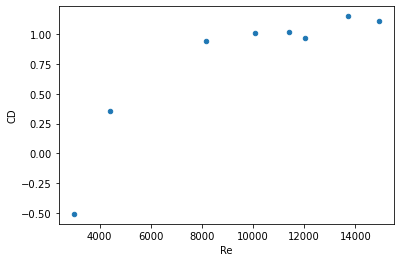

In [38]:
DatosCD.plot.scatter(x="Re", y="CD")

In [32]:
Uinf = Velocidad_tunel(42.2)

In [27]:
Drag1 = 1475


In [29]:
Drag1-Drag0

-50.432841530056066

In [33]:
(50*1e-3*9.8)/(Uinf**2*A/2*rho)

3.307368452263369

In [34]:
Drag0

1525.432841530056

1.2095062699200583